### Code from https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6

In [107]:
import numpy as np
np.set_printoptions(threshold=100)
# Generating 2,000 readers' reponse.
# Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means clap. 0 means no clap.
# We pick the success rate of 30%.
clap_prob = 0.3
# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)
print(clap_data)

[1 1 1 ... 0 0 0]


Two options for a prior:
1) A uniform prior

In [108]:
import matplotlib.pyplot as plt

# domain θ
theta_range = np.linspace(0, 1, 1001)
# prior distribution P(θ)
prior1 = np.ones(1001)/1000
print(list(zip(theta_range, prior1))[:5])

[(0.0, 0.001), (0.001, 0.001), (0.002, 0.001), (0.003, 0.001), (0.004, 0.001)]


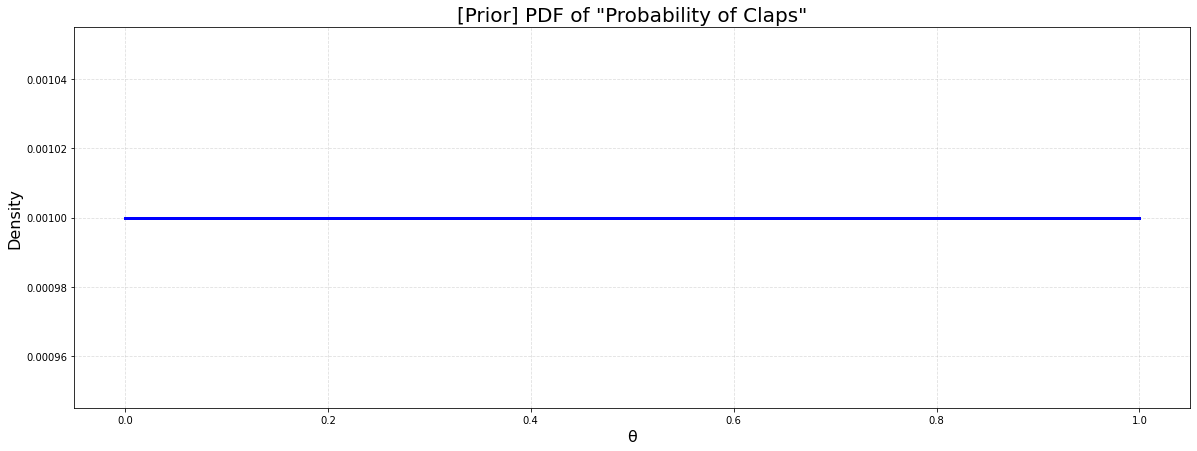

In [109]:
def plot_prior(prior):
    # Plotting the prior distribution
    plt.rcParams['figure.figsize'] = [20, 7]
    fig1, ax1 = plt.subplots()
    ax1.plot(theta_range, prior, linewidth=3, color='blue')

    # Add a title
    ax1.set_title('[Prior] PDF of "Probability of Claps"', fontsize=20)

    # Add X and y Label
    ax1.set_xlabel('θ', fontsize=16)
    ax1.set_ylabel('Density', fontsize=16)

    # Add a grid
    ax1.grid(alpha=.4, linestyle='--')

    # Show the plot
    plt.show()
plot_prior(prior1)

2) Beta distribution

In [110]:
import scipy.stats as stats

a = 400  # number of people who clapped on one random day
b = 2000 - a  # number of people who didn't clap

# domain θ
theta_range = np.linspace(0, 1, 1001)
# prior distribution P(θ)
prior2 = stats.beta.pdf(x = theta_range, a=a, b=b)
print(list(zip(theta_range, prior2))[:5])

[(0.0, 0.0), (0.001, 0.0), (0.002, 0.0), (0.003, 0.0), (0.004, 0.0)]


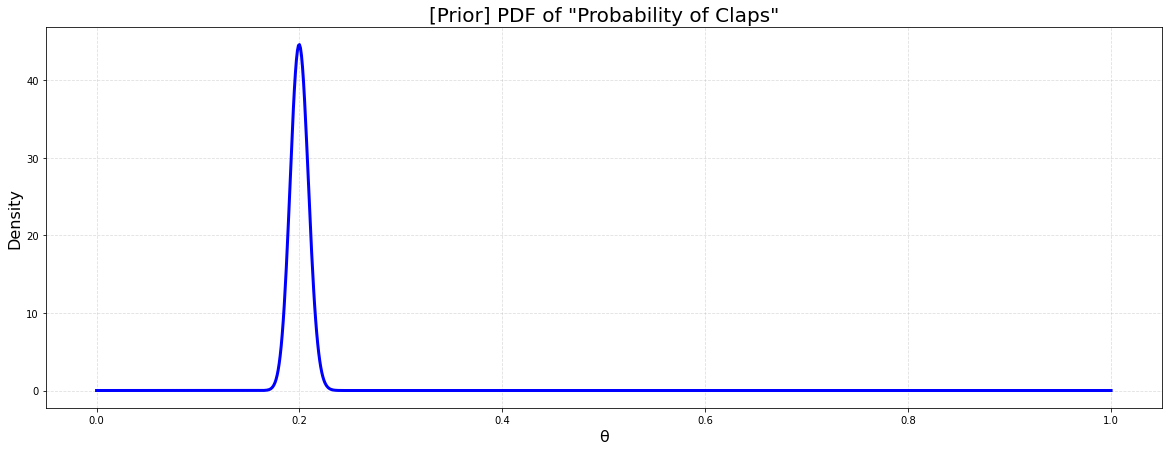

In [111]:
# # Plotting the prior distribution
# plt.rcParams['figure.figsize'] = [20, 7]
# fig2, ax2 = plt.subplots()
# ax2.plot(theta_range, prior2, linewidth=3, color='palegreen')
#
# # Add a title
# ax2.set_title('[Beta Prior] PDF of "Probability of Claps"', fontsize=20)
#
# # Add X and y Label
# ax2.set_xlabel('θ', fontsize=16)
# ax2.set_ylabel('Density', fontsize=16)
#
# # Add a grid
# ax2.grid(alpha=.4, linestyle='--')
#
# # Show the plot
# plt.show()
# # Centered at 0.2 from the 400 / 2000 data

plot_prior(prior2)

Define a binomial distribution as the likelihood / sampling distribution term

In [112]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range)

We need to calculate the denominator of Bayes' theorem, which is an integral over the above P(X|θ) for all θ's

In [113]:
normalization = np.trapz(likelihood)
print(f"{normalization=}")

# Scale likelihood
likelihood = likelihood / normalization

normalization=0.4997501249375317


Plot the likelihood

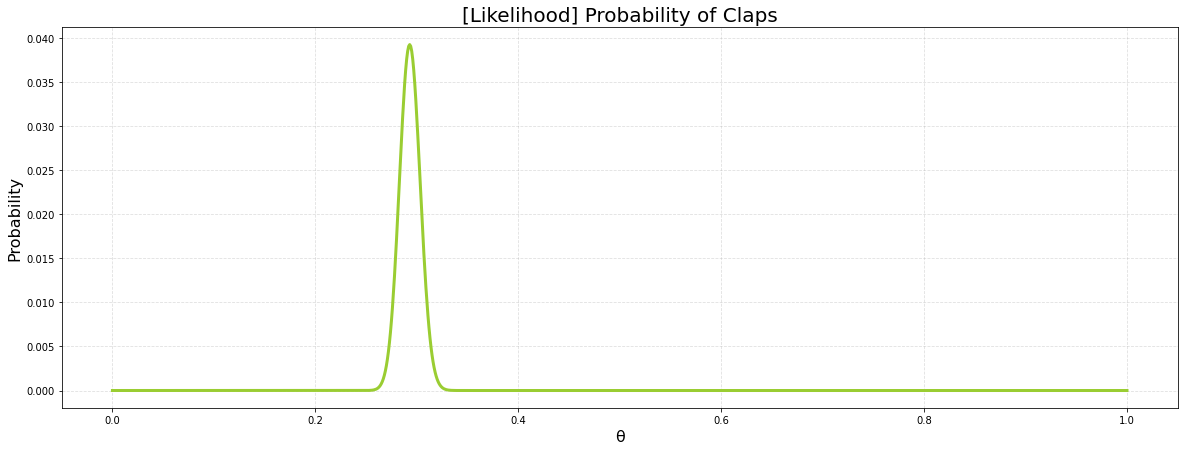

In [114]:

# Create the plot
fig3, ax3 = plt.subplots()
ax3.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')

# Add a title
ax3.set_title('[Likelihood] Probability of Claps' , fontsize=20)

# Add X and y Label
ax3.set_xlabel("θ", fontsize=16)
ax3.set_ylabel("Probability", fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()
# Centered at 0.3

Now it's time to calculate the posterior density. If we use the uniform prior...

In [115]:
def create_posterior(prior):
    posterior = likelihood * prior # element-wise multiplication
    second_normalization = np.sum(posterior)
    print(f"{second_normalization=}")
    normalized_posterior = posterior / np.sum(posterior)

    print(f"{np.argmax(prior)=}")
    print(f"{np.argmax(likelihood)=}")
    print(f"{np.argmax(posterior)=}")
    return posterior
posterior1 = create_posterior(prior1)

second_normalization=0.001
np.argmax(prior)=0
np.argmax(likelihood)=293
np.argmax(posterior)=293


Plot the results together

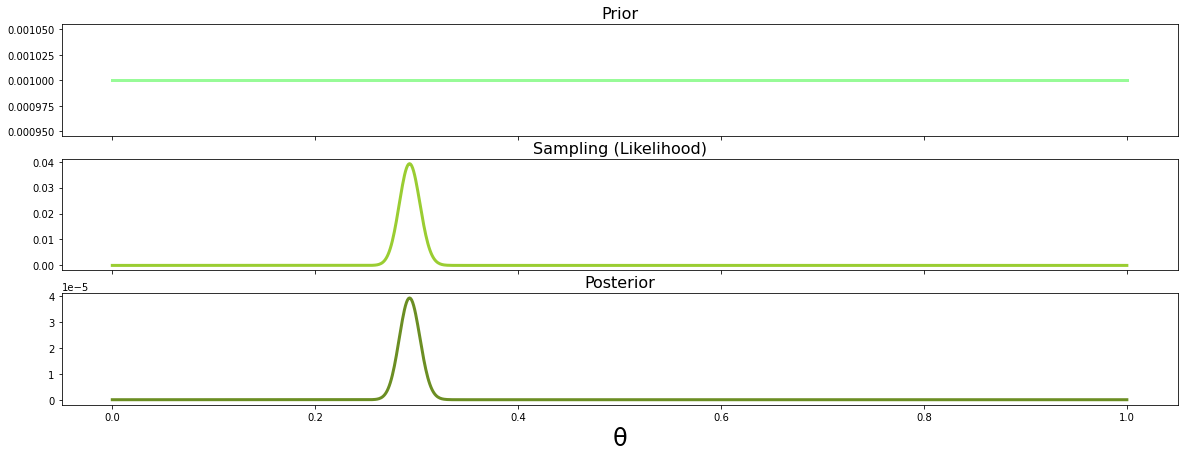

In [116]:
def plot_together(posterior, prior):
    # Plotting all three together
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
    plt.xlabel('θ', fontsize=24)

    axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
    axes[0].set_title("Prior", fontsize=16)

    axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
    axes[1].set_title("Sampling (Likelihood)", fontsize=16)

    axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
    axes[2].set_title("Posterior", fontsize=16)
    plt.show()
plot_together(posterior1, prior1)

Let's try the beta distribution

second_normalization=1.7841735043559866e-09
np.argmax(prior)=200
np.argmax(likelihood)=293
np.argmax(posterior)=246


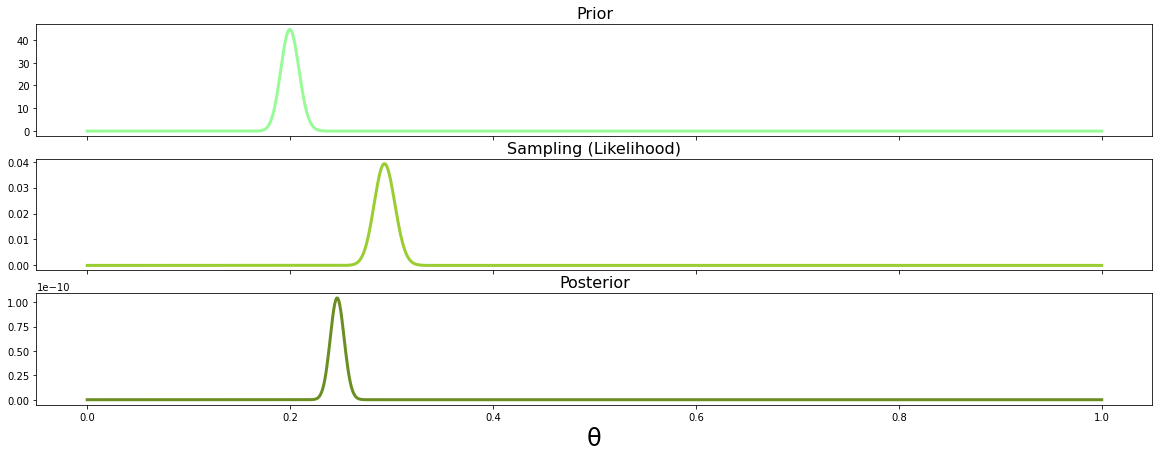

In [117]:
posterior2 = create_posterior(prior2)
plot_together(posterior2, prior2)